# Exercise Fourteen: Project Design Starter
In this exercise, you'll be planning out a complex project. You'll draw in some code, but focus on commenting to describe your project structure. The sample document below will guide you through organizing and annotating your project design. The primary components you'll include are:

- Dependencies: What modules will your project need?
- Collection: Where is your data coming from?
- Processing: How will you format and process your data?
- Analysis: What techniques will you use to understand your data?
- Visualization: How will you visualize and explore your data?

Don't worry if you aren't exactly certain how you would implement everything - this should be a starting point for a larger research study, but it doesn't need to be a complete, functional workflow. Aim for a "good enough" starting point that you can reference and extend for future work.

Note where you have something working, and where it's broken or in progress.

Race After Technology: Chapter 5
Digital Humanities Coursebook: Coda

(Karsdorp, Kestemont, and Riddell).


## Project Overview: NaNoGenMo
This sample project builds on our previous exercises inspired by National Novel Generation Month. It offers a framework for exporing text generation based upon children's literature, inspired by NaNoGenMo's call to think about different forms of procedural making. As such, it is guided by that project's rule: "Spend the month of November writing code that generates a novel of 50k+ words."

(Replace this text with a short description of what your envisioned project design will accomplish. Include your research question and goals for this analysis.)

## Stage One: Dependencies

Add the import code for every dependency of your project: for instance, if you are collecting data, you might import Tweepy or BeautifulSoup. If you're working with a file of folders, import os. Most projects will require Pandas, along with appropriate processing and visualization libraries. In the comments, explain briefly why you are including each library (as shown in the example below.)



(Karsdorp, Kestemont, and Riddell).

As a result, comfort has been established as BeautifulSoup enables movement to work without an API. Enforcing beginning with "a problem or a question. If your problem or question is not well defined, develop or find one which is" (Karsdorp, Kestemont, Riddell 323) comes alive.

In [20]:
# Python Package imports
import requests
from bs4 import BeautifulSoup
from dateutil.parser import parse
import concurrent.futures
import pandas as pd

## Stage Two: Collection
Describe your data collection scope and process briefly, and include an example of how you might collect your data drawing on our other projects. For example, if this workflow will collect Twitter data from a stream, you might revisit that demo, copy the stream, and adjust the hashtag.

(Karsdorp, Kestemont, and Riddell).

In [21]:
# Collect data using a Tweepy stream (example annotation)
# (Copy and modify code from other exercises to prototype this goal)

In [22]:
# Maximum number of threads that will be spawned
MAX_THREADS = 50

In [23]:
movie_title_arr = []
movie_year_arr = []
movie_genre_arr = []
movie_synopsis_arr =[]
image_url_arr  = []
image_id_arr = []

In [24]:
def getMovieTitle(header):
    try:
        return header[0].find("a").getText()
    except:
        return 'NA'

def getReleaseYear(header):
    try:
        return header[0].find("span",  {"class": "lister-item-year text-muted unbold"}).getText()
    except:
        return 'NA'

def getGenre(muted_text):
    try:
        return muted_text.find("span",  {"class":  "genre"}).getText()
    except:
        return 'NA'

def getsynopsys(movie):
    try:
        return movie.find_all("p", {"class":  "text-muted"})[1].getText()
    except:
        return 'NA'

def getImage(image):
    try:
        return image.get('loadlate')
    except:
        return 'NA'

def getImageId(image):
    try:
        return image.get('data-tconst')
    except:
        return 'NA'

In [25]:
def main(imdb_url):
    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Movie Name
    movies_list  = soup.find_all("div", {"class": "lister-item mode-advanced"})
    
    for movie in movies_list:
        header = movie.find_all("h3", {"class":  "lister-item-header"})
        muted_text = movie.find_all("p", {"class":  "text-muted"})[0]
        imageDiv =  movie.find("div", {"class": "lister-item-image float-left"})
        image = imageDiv.find("img", "loadlate")
        
        #  Movie Title
        movie_title =  getMovieTitle(header)
        movie_title_arr.append(movie_title)
        
        #  Movie release year
        year = getReleaseYear(header)
        movie_year_arr.append(year)
        
        #  Genre  of movie
        genre = getGenre(muted_text)
        movie_genre_arr.append(genre)
        
        # Movie Synopsys
        synopsis = getsynopsys(movie)
        movie_synopsis_arr.append(synopsis)
        
        #  Image attributes
        img_url = getImage(image)
        image_url_arr.append(img_url)
        
        image_id = image.get('data-tconst')
        image_id_arr.append(image_id)

In [26]:
# An array to store all the URL that are being queried
imageArr = []

# Maximum number of pages one wants to iterate over
MAX_PAGE =51

# Loop to generate all the URLS.
for i in range(0,MAX_PAGE):
    totalRecords = 0 if i==0 else (250*i)+1
    print(totalRecords)
    imdb_url = f'https://www.imdb.com/search/title/?release_date=2020-01-02,2021-02-01&user_rating=4.0,10.0&languages=en&count=250&start={totalRecords}&ref_=adv_nxt'
    imageArr.append(imdb_url)

0
251
501
751
1001
1251
1501
1751
2001
2251
2501
2751
3001
3251
3501
3751
4001
4251
4501
4751
5001
5251
5501
5751
6001
6251
6501
6751
7001
7251
7501
7751
8001
8251
8501
8751
9001
9251
9501
9751
10001
10251
10501
10751
11001
11251
11501
11751
12001
12251
12501


In [27]:
def download_stories(story_urls):
    threads = min(MAX_THREADS, len(story_urls))
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(main, story_urls)

In [28]:
# Call the download function with the array of URLS called imageArr
download_stories(imageArr)

# Attach all the data to the pandas dataframe. You can optionally write it to a CSV file as well
movieDf = pd.DataFrame({
    "Title": movie_title_arr,
    "Release_Year": movie_year_arr,
    "Genre": movie_genre_arr,
    "Synopsis": movie_synopsis_arr,
    "image_url": image_url_arr,
    "image_id": image_id_arr,
})


In [29]:
print('--------- Download Complete CSV Formed --------')

# movie.to_csv('file.csv', index=False) : If you want to store the file.
movieDf.head()

--------- Download Complete CSV Formed --------


,Title,Release_Year,Genre,Synopsis,image_url,image_id
0,The Great,(2020– ),"\nBiography, Comedy, Drama",\nA royal woman living in rural Russia during ...,https://m.media-amazon.com/images/M/MV5BYzVmOG...,tt2235759
1,Ted Lasso,(2020– ),"\nComedy, Drama, Sport",\nAmerican college football coach Ted Lasso he...,https://m.media-amazon.com/images/M/MV5BMDVmOD...,tt10986410
2,Bruised,(2020),"\nDrama, Sport",\nA disgraced MMA fighter finds redemption in ...,https://m.media-amazon.com/images/M/MV5BMWRjZG...,tt8310474
3,Locke & Key,(2020– ),"\nDrama, Fantasy, Horror",\nAfter their father is murdered under mysteri...,https://m.media-amazon.com/images/M/MV5BNmYyNW...,tt3007572
4,Tiger King,(2020–2021),"\nDocumentary, Biography, Crime",\nA rivalry between big cat eccentrics takes a...,https://m.media-amazon.com/images/M/MV5BYzI5Mj...,tt11823076


With the use of exploring the URL of interest, https://www.metacritic.com/game/playstation-3/the-walking-dead-a-telltale-games-series/user-reviews?page=, it allowed for the process to “Consider many models. Different narratives are often compatible with the same set of observations” (Karsdorp, Kestemont, Riddell 324).

In [30]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0, 50):
    url = 'https://www.metacritic.com/game/playstation-3/the-walking-dead-a-telltale-games-series/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
          #  print(review.find('div',class_='review_body').find('span').text)

## Stage Three: Processing
After your data has been collected or imported, store it in a format that works for your purposes. This can vary: for Twitter analysis, it might be a Pandas dataframe, while for text, you might build a document term matrix.

(Karsdorp, Kestemont, and Riddell).

In [31]:
# Store Twitter data using Pandas with appropriate column names (example comment)
# (Copy and modify code from other exercises to prototype this goal)

Creating Pandas' data frame was a smooth process, which contributed to the fun lines allowing for an "Account for variability in human judgments" (Karsdorp, Kestemont, Riddell 324), enabling organizational aspects toward the coding journey to become more formulated.

In [32]:
ac_reviews = pd.DataFrame(review_dict)
print(ac_reviews)

                name          date rating  \
0           chujfugh  Dec 12, 2012     10   
1      the_blueprint  Dec 11, 2013      8   
2    SayHeyToPhillip  Jun 27, 2014      9   
3     TheOnlineGamer  Jan 13, 2014     10   
4          HSPLazerz  May  8, 2015     10   
..               ...           ...    ...   
111           Folmer  Feb 23, 2019     10   
112           Xalted  Oct 22, 2019     10   
113          INU4SH4  Jul  3, 2020      9   
114     EndlessAbyss  Sep 27, 2020     10   
115     kappawappa23  Apr  5, 2021     10   

                                                review  
0    For 30 years, games have been held back by the...  
1    I like the game because the story and characte...  
2    The Walking Dead gathers everything from enter...  
3    Captures the essence of The Walking Dead Comic...  
4    By far, the best game I have ever, and will ev...  
..                                                 ...  
111  This game has a really great story, and it is ...  
112

## Stage Four: Analysis
Think across all of the methods we've tried this semester - what combination would be most helpful for your goals? Include code sections for each method you think is important. In most cases, a combination will be most revealing: for instance, you might employ several different textual analysis frameworks on a set of documents. Use at least two distinctly different methods of analysis.

(Karsdorp, Kestemont, and Riddell).

In [33]:
# Compare several account outputs using PCA (example comment)
# (Copy and modify code from other exercises to prototype this goal)

Used to clean up and help remove characters etc., as BeautifulSoup enabled significant aspects of cleaning setup, exploring "ideas from math and (Bayesian) statistics. Good ideas are found everywhere" (Karsdorp, Kestemont, Riddell 324).

In [34]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [35]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [36]:
cleaned_reviews = []
for i in range(0,len(ac_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((ac_reviews.review[i])))
print(cleaned_reviews[0:5])

['for years games have been held back the idea that fun defining factor sure love fun and one the most powerful ways engross player but imagine all films fit under the category fun wouldn have films like schindler list hurt locker apocalypse now and the godfather our medium has never had our own citizen kane own godfather until now spec ops the line was the apocalypse now gaming and skyrim the lord the rings the walking dead the dead alive and even that isn doing justice dead alive the best zombie film ever look past the glitches and have near perfect game the puzzles are tricky and take fair bit though the art style the best use cell shading seen the characters are well written and have arcs its atmosphere very tense and you have the urge play the very end once you picked the episodes themselves were quite short hours best but the retail release actually makes seem like one coherent game instead playing parts game months apart actions have consequences the littlest choice has the huge

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["walking","dead","telltale","kill"])

Used variance in code and color, and size enabled for visualized experimentation and expression, as "The creation of digital assets will then serve the project's overall design" (Drucker 193).

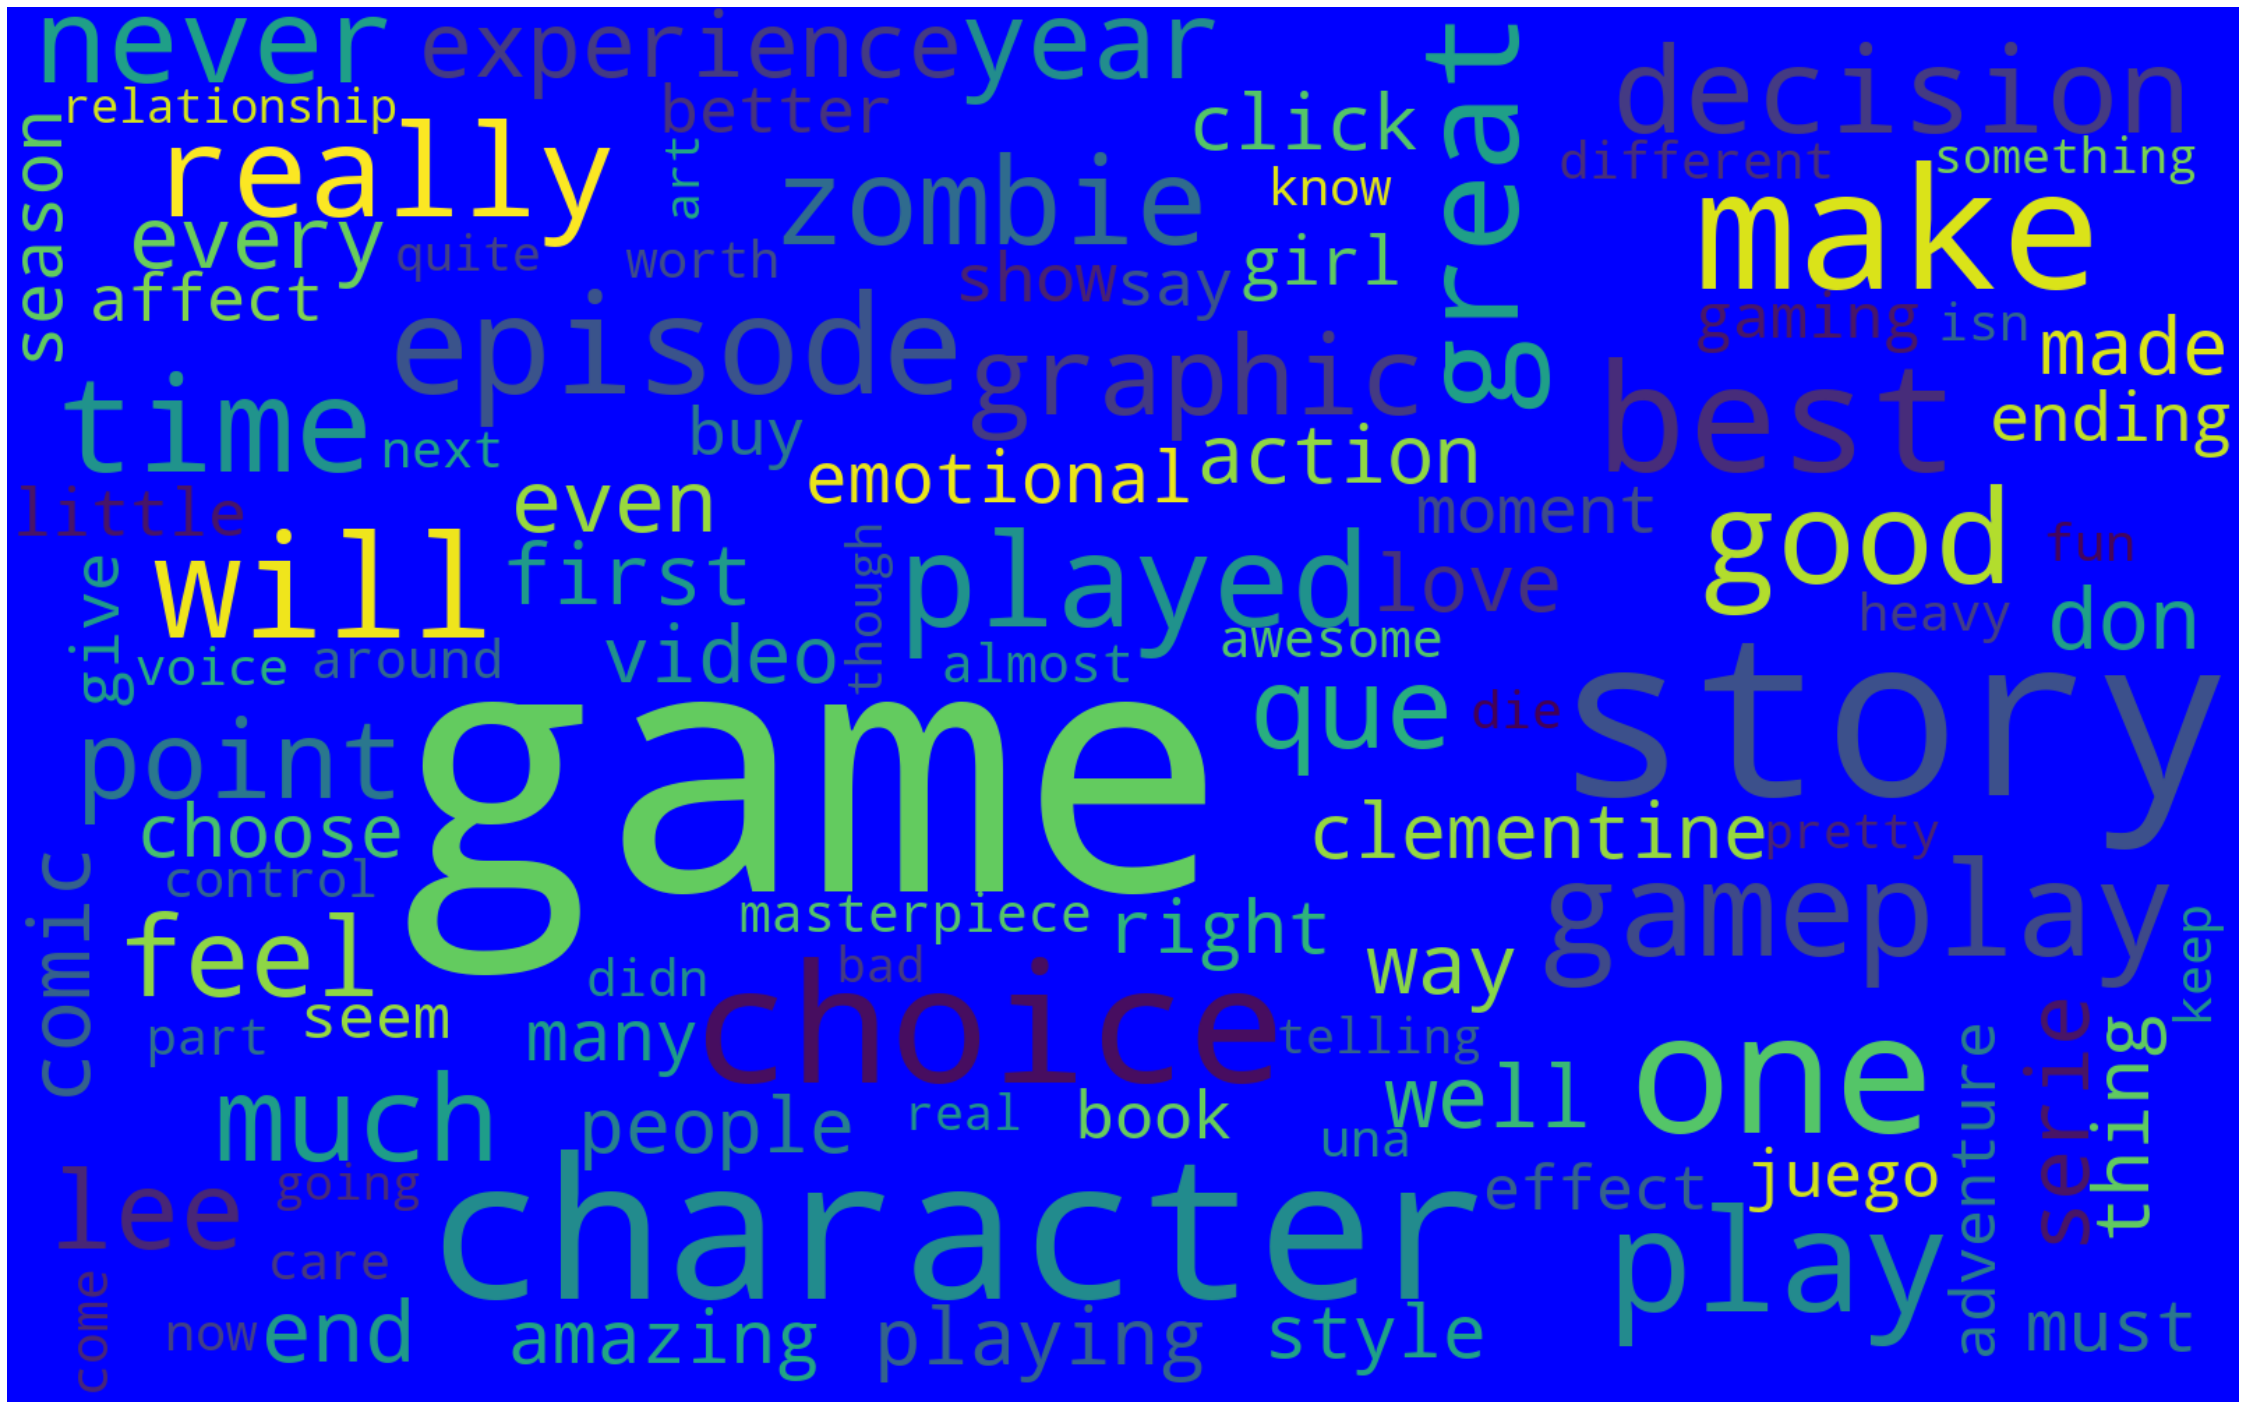

In [38]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=1000,max_font_size=250,max_words=100,collocations=False, background_color='blue').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Stage Five: Visualization
Finally, think about the visualizations that would be most useful to sharing and exploring your data. Consider both static and dynamic approaches from the different libraries we've worked with this semester. Include at least two preliminary visualizations.

(Karsdorp, Kestemont, and Riddell).

In [39]:
# Build a wordcloud of term distributions in each document (example comment)
# (Copy and modify code from other exercises to prototype this goal)

In [ ]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('Walk.PNG'))

Took out subplots and changed toward variance of color. A higher-resolution image can be achieved by funding fixed color numbers and adjusting the range.

In [40]:
wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=250,max_words=100,collocations=False,background_color='violet').generate(string)
f = plt.figure(figsize=(40,30))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('The Walking Dead', size='100')
plt.axis("off")
plt.show()

NameError: name 'mask' is not defined

Stage Five: Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed
A sentiment drew interest in charting differences in a sentiment score, which became the range of judgments, signifying that “Knowledge of the existing tools and platforms for this aspect of research is important” (Drucker 199).

In [41]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [42]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [43]:
ac_reviews['Sentiment Score'] = ac_reviews['review'].apply(calculate_sentiment)
ac_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
71,MooreReviews,"Jun 18, 2013",9,I took shot In the dark with this game. The on...,0.9967
72,Jellybean15,"Aug 6, 2013",9,"When I first received this game in the mail, I...",0.9942
87,dj_cole,"Nov 17, 2014",8,The best way to describe the Walking Dead Seas...,0.9934
19,TheQuietGamer,"Dec 28, 2012",9,Just a heads up I have played all 5 episodes o...,0.9916
62,dirtyjeff,"Apr 1, 2013",7,I'm not a fan of the Walking Dead TV series bu...,0.9888
0,chujfugh,"Dec 12, 2012",10,"For 30 years, games have been held back by the...",0.9883
74,mijxero,"Aug 2, 2014",10,I don't normally give out 10s but this game de...,0.9848
51,Toffenuff,"Jul 2, 2014",9,"I'm a big fan of open-world, make-your-own sto...",0.9835
76,SJ-ULTI-Reiews,"Sep 29, 2013",10,"This game was my Game of the Year for 2012, an...",0.9823
3,TheOnlineGamer,"Jan 13, 2014",10,Captures the essence of The Walking Dead Comic...,0.9819


NOTES: New with color pallets etc., tried "jitter" and palettes import. Review scores are numerical were as the "jitter" brings in due to being applied to the bar space.

In [44]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

#file for output
output_file(filename="ac.html", title="AC Reviews Visualization")

I experimented with the range and size of indicators, etc., as “A platform with a broad user community is more likely to last—and to provide help support in the form of list-servs and other venues” (Drucker 199).

In [45]:
ac_reviews['rating'] = ac_reviews['rating'].astype(int)
source = ColumnDataSource(ac_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-3 ,high=2)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=2,range=p.x_range), y='Sentiment Score', source=source, size=10, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'The Walking Dead Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

Even though it is light in modes, HTML visual presentation, does show the separation of scores of sentiment, etc., separated by light and dark components, as "a repository like GitHub ...is an invaluable resource for anyone working on digital project development” (Drucker 208).

In [46]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...

In [ ]:
{  
   "Search":[  
      {  
         "Title":"Avengers: Endgame",
         "Year":"2019",
         "imdbID":"tt4154796",
         "Type":"movie",
         "Poster":"https://m.media-amazon.com/images/M/MV5BNGZiMzBkZjMtNjE3Mi00MWNlLWIyYjItYTk3MjY0Yjg5ODZkXkEyXkFqcGdeQXVyNDg4NjY5OTQ@._V1_SX300.jpg"
      }
   ],
   "totalResults":"1",
   "Response":"True"
}

In [ ]:
{  
   "Title":"Avengers: Endgame",
   "Year":"2019",
   "Rated":"N/A",
   "Released":"26 Apr 2019",
   "Runtime":"N/A",
   "Genre":"Action, Adventure, Fantasy, Sci-Fi",
   "Director":"Anthony Russo, Joe Russo",
   "Writer":"Christopher Markus, Stephen McFeely, Stan Lee (based on the Marvel comics by), Jack Kirby (based on the Marvel comics by), Jim Starlin (comic book)",
   "Actors":"Bradley Cooper, Brie Larson, Chris Hemsworth, Chris Evans",
   "Plot":"After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to undo Thanos' actions and restore order to the universe.",
   "Language":"English",
   "Country":"USA",
   "Awards":"N/A",
   "Poster":"https://m.media-amazon.com/images/M/MV5BNGZiMzBkZjMtNjE3Mi00MWNlLWIyYjItYTk3MjY0Yjg5ODZkXkEyXkFqcGdeQXVyNDg4NjY5OTQ@._V1_SX300.jpg",
   "Ratings":[  
   ],
   "Metascore":"N/A",
   "imdbRating":"N/A",
   "imdbVotes":"N/A",
   "imdbID":"tt4154796",
   "Type":"movie",
   "DVD":"N/A",
   "BoxOffice":"N/A",
   "Production":"Marvel Studios",
   "Website":"N/A",
   "Response":"True"
}

In [ ]:
$ pip install unirest


In [ ]:
var unirest = require('unirest');
unirest.post(API_URL)
  .header("X-RapidAPI-Key", API_KEY)
  .end(function (result) {
    console.log(result.status, result.headers, result.body);
  });